#### <h1><center>CMSC 471: Introduction to Artificial Intelligence</center></h1>

<center><img src="img/title.jpeg" align="center"/></center>


<h3 style="color:blue;"><center>Instructor: Fereydoon Vafaei</center></h3>


<h5 style="color:purple;"><center>Search in Complex Environments: Local Search & Beyond</center></h5>

<center><img src="img/UMBC_logo.png" align="center"/></center>

<h1><center>Search in Complex Environments</center></h1>

<h5><center>"In which we relax the simplifying assumptions of the previous chapter, to get closer to the real world."</center></h5>

- <ins><b>Agenda</b></ins>
    - Local Search
        - Hill Climbing
        - Simulated Annealing
        - Local Beam Search
        - Evolutionary Algorithms
            - Genetic Algorithms
    - Local Search in Continuous Spaces
        - Gradient Ascent & Gradient Descent
    - Online Search

<h1><center>Local Search</center></h1>

- Local search algorithms operate using a single current node (rather than multiple paths), and generally move only to neighbors of that node.

- Local serach algorithms are useful for solving <font color="blue">optimization problems</font>, in which the aim is to find the best state according to an <font color="blue">objective function</font>. 

<h1><center>Optimization Problems</center></h1>

<img src="img/fig-4-1.png" align="center"/>

From Russel & Norvig Textbook

<h1><center>Hill Climbing</center></h1>

- Also known as Steepest Ascent: This is our first example of a local search algorithm.


- Imagine you are climbing a mountain and you are in a very thick fog. You can only see a distance equal to one step length. To try to climb you take the step in the direction that is steepest to get to the highest point of all the locations you can currently see.


- In other words, hill-climbing search simply evaluates the objective function for all states that are neighbors to the current state, and takes the neighbor state with the best objective function value as the new current state. If there are more than one next best states, one is picked randomly.


- Hill-climbing search is sometimes called **greedy local search**, because a step is taken after only considering the immediate neighbors, and it grabs a good neighbor state without thinking ahead about where to go next. No time is spent considering possible future states.

<h1><center>Hill Climbing</center></h1>

<img src="img/fig-4-2.png" align="center"/>

<h1><center>Solving 8-Queens Problem by Hill Climbing</center></h1>

- The initial state is chosen at random, and the successors of a state are all possible states generated by moving a single queen to another square in the same column (so each state has 8x7=56 successors).
- The heuristic cost function $h$ is the number of pairs of queens that are attacking each other; this will be zero only for solutions.

<center><img src="img/fig-4-3.png" align="center"/></center>

<h1><center>Hill Climbing Simulation-1</center></h1>

<img src="img/sa-1.jpg" align="center"/>

Image from: https://rs.io/ultimate-guide-simulated-annealing/

<h1><center>Hill Climbing Simulation-2</center></h1>

<img src="img/hc.jpg" align="center"/>

Image from: https://rs.io/ultimate-guide-simulated-annealing/

<h1><center>Hill Climbing Failure-1: Local Optima</center></h1>

<img src="img/hc-fail.jpg" align="center"/>

Image from: https://rs.io/ultimate-guide-simulated-annealing/

<h1><center>Hill Climbing Failure-2: Ridges</center></h1>

- A **ridge** is shown in Figure 4.4. Ridges result in a sequence of local maxima that is very difficult for greedy algorithms to navigate.

<center><img src="img/ridges.png" align="center"/></center>

Image from Russel & Norvig AIMA Textbook

<h1><center>Hill Climbing Limitations</center></h1>

Hill-climbing is easy to formulate and implement and often finds
pretty good states quickly.  But, it has the following problems:

  * It may get stuck on **local optima** (hills for maximizing searches, valleys for minimizing searches,
  * It may get stuck on a **ridge**, if no single action can advance the search along the ridge,
  * It may get stuck wandering on a **plateau** for which all neighboring states have equal value for the objective function.

Common variations and resolutions include:
  * allow sideways moves (when on a **plateau**)
  * stochastic hill-climbing: choose next state with probability related to increase in value of objective function
  * first-choice hill-climbing: generate neighbors by random choice of available actions and keep first state that has better value,
  * random-restart hill climbing: conduct multiple hill-climbing searches from multiple, randomly generated initial states.

Only this last one, with random-restarts, is **complete**.  In the limit, all states will be tried as starting states so the goal, or best state, will eventually be found.

<h1><center>Simulated Annealing</center></h1>

- The success of Hill Climbing depends very much on the shape of the state-space landscape.

- Hill Climbing searches will get stuck on local optima.  Only by adding random restarts can you have a Hill Climbing algorithm that is complete.

- To get off of a local optimum, a search must be defined to allow steps that are "downhill" for maximizing searches, and "uphill" for minimizing searches, away from the optimum. 

- [**Simulated annealing**](https://www.mit.edu/~dbertsim/papers/Optimization/Simulated%20annealing.pdf) is an algorithm that does this probabilisitically.  In metallurgy, **annealing** is the process used to temper or harden metals and glass by heating them to a high temprature and then gradually cooling them, thus allowing the material to reach a low-energy crystalline state.

<h1><center>Simulated Annealing</center></h1>


- Assume we are doing a maximizing search, meaning we want to find the state with the maximum value.  Let the value of the current state be $v$.  Imagine an action has been applied to that state and the resulting state has a lower (worse) value $v'$.  Simulated annealing will accept this new state as the current state with probability: $$e^{(v' - v)/T}$$

- $T$ is like a "temperature", the higher the value the more likely we are to take a step to a state with a worse value. In practice, $T$ starts at a high value and is slowly decreased towards zero.  If it is decreased "slowly enough", the global optimum will be found with probabilty 1.  In other words, this is a **complete** algorithm if the cooling strategy is slow enough.

<h1><center>Simulated Annealing</center></h1>

<center><img src="img/fig-4-4.png" align="center"/></center>

<h1><center>Simulated Annealing Simulation-1</center></h1>

<img src="img/sa-1.jpg" align="center"/>

Image from: https://rs.io/ultimate-guide-simulated-annealing/

<h1><center>Simulated Annealing - Ping-Pong Ball Shaking Intuition</center></h1>

<img src="img/sa-ping-pong.jpg" align="center"/>

Image from: https://rs.io/ultimate-guide-simulated-annealing/

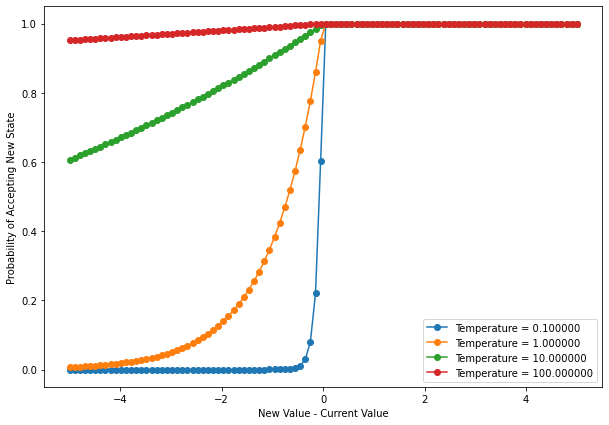

In [3]:
# Code credit: Professor Chuck Anderson - CSU
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def probOfAcceptance(dE, T):
    r = np.exp(dE/T)
    r[r>1] = 1.0
    return r
    
dE = np.linspace(-5, 5, num=100)

plt.figure(figsize=(10,7))
plt.clf()
legendText = []
for T in [0.1, 1, 10, 100]:
    plt.plot(dE, probOfAcceptance(dE,T), 'o-')
    legendText.append('Temperature = {:1f}'.format(T))
plt.xlabel('New Value - Current Value')
plt.ylabel('Probability of Accepting New State')
plt.legend(legendText,loc='lower right');

<h1><center>Local Beam Search</center></h1>

- Keeping just one node in memory might seem to be an extreme reaction to the problem of memory limitation.

- The **local beam search** algorithm keeps track of $k$ states rather than just one. It begins with $k$ randomly generated states.

- At each step, all the successors of all $k$ states are generated. If any one is a goal, the algorithm halts. Otherwise, it selects the $k$ best successors from the complete list and repeats.

<h1><center>Local Beam Search</center></h1>

<center><img src="img/local-beam-search.jpg" align="center"/></center>

<font size=1>Image from Prof. Lathrop's Slides UC-Irvine</font>

<h1><center>Local Beam Search vs Random Restart Search</center></h1>

- At first sight, a local beam search with $k$ states might seem to be nothing more than running $k$ random restarts in parallel instead of in sequence.

- In fact, the two algorithms are quite different!

- In a random-restart search, each search process runs independently of the others. In a local beam search, useful information is passed among the parallel search threads.

- In effect, the states that generate the best successors say to the others, "Come over here, the grass is greener!" The algorithm quickly abandons unfruitful searches and moves its resources to where the most progress is being made.

<h1><center>Local Beam Search Limitation: Diversity</center></h1>

- Local beam search can suffer from a lack of **diversity** among the $k$ states. They can become clustered in a small region of the state-space, making the search little more than a $k$-times-slower version of Hill Climbing. 

- A variant called **stochastic beam search**, analogous to stochastic hill climbing, helps alleviate this problem. Instead of choosing the top $k$ successors, stochastic beam search chooses successors with probability proportional to the successor's value, this increasing **diversity**.

<h1><center>Evolutionary Algorithms</center></h1>

- **Evolutionary algorithms** can be seen as variants of stochastic beam search that are explicitly motivated by the metaphor of **natural selection** in Biology.

- There is a population of individuals (states), in which the fittest (highest value) individuals produce offspring (successor states) that populate the next generation, a process called **recombination**.

<h1><center>Different Forms of Evolutionary Algorithms</center></h1>

- There are endless forms of evolutionary algorithms, varying in the following ways:

    - The size of the poulation.
    - The representation of each individual. In **genetic algorithm**, each individual is a string over a finite alphabet just as DNA.
    - The mixing number $\rho$, which is the number of parents that come together to form offspring. The most common case is $\rho=2$.
    - The **selection** process for selecting the individuals who will become the parents of the next generation: one possibility is to select from all individuals with probability proportional to their fitness score.
    - The recombination procedure.
    - The **mutation rate**, which determines how often offspring have random mutations to their representation.
    - The makeup of the next generation.This can be just the newly formed offspring, or it can include a few top-scoring parents from the previous generation.


<h1><center>Genetic Algorithm - 8 Queens</center></h1>

<center><img src="img/fig-4-5.png" align="center"/></center>

<center><img src="img/fig-4-6.png" align="center"/></center>

[Genetic Algorithm Demo -1](http://math.hws.edu/eck/js/genetic-algorithm/GA.html)

[Geneti Algorithm Demo -2](https://www.youtube.com/watch?v=XcinBPhgT7M)

<h1><center>Local Search in Continuous Spaces - Empirical Gradient Methods</center></h1>

- Methods that measure progress by the change in the value of the objective function between two nearby points are called **empirical gradient** methods.


- Empirical gradient search is the same as steepest-asecnt hill climbing in a discretized version of the state space.

<h1><center>Empirical Gradient Methods - Airports Example</center></h1>

- Suppose we want to place three new airports anywhere in Romania, such that the sum of squared straight-line distances from each city on the map to its nearest airport is minimized.

- The state space is then defined by the coordinates of the three airports: $(x_1,y_1), (x_2,y_2), (x_3,y_3)$

- This is a **six-dimensional** space; we also say that states are defined by six **variables**. In general, states are defined by an $n$-dimensional vector of variables **x**.

- Moving around in this space corresponds to moving one or more of the airports on the map.

- The objective function $f(x)$ is computed as follows where $C_i$ is the set of cities whose closest airport (in the state **x**) is airport $i$:

<center><img src="img/eq-4-1.png" align="center"/></center>

<h1><center>Gradient Vector</center></h1>

- The gradient of the objective function is a vector $\nabla f$ that gives the magnitude and direction of the steepest slope.

- For the airport problem, the gradient vector is:

<center><img src="img/eq-gradient.png" align="center"/></center>

- In some cases, we can find a maximum by solving the equation $\nabla f = 0$

- In many cases, however, this equation can't be solved in closed form, and we can compute the gradient **locally** but not **globally**; for the airport example as follows:

<center><img src="img/eq-4-2.png" align="center"/></center>

- Given a locally correct expression for the gradient, we can perform steepest-ascent hill climbing by updating the current state according to the following formula where $\alpha$ is a small constant often called the **step size** or **learning rate**:

<center><img src="img/eq-4-2-update.png" align="center"/></center>

<h1><center>Local Search in Continuous Spaces - Gradient Ascent</center></h1>

- Gradient Ascent Algorithm

<center><img src="img/GA.png" align="center"/></center>

<font size=1>Image source: https://medium.com/common-notes/gradient-ascent-e23738464a19</font>

<h1><center>Gradient Descent</center></h1>

<center><img src="img/gradient.png" align="center"/></center>

Image from: Hands-On ML Textbook 2nd Edition, 2019

<h1><center>Derivatives of Value Function</center></h1>

- When the  derivative of the value function with respect to each component of the state can be calculated, then many derivative-based searches are available.


- If you know the slope at the current state, you know which direction to go.  If you also know the second derivative, you can make some intelligent guesses at how far to go. (the matrix of second-derivatives is called **Hessian Matrix**)


- If the state has multiple components, almost always the case, the derivatives are **gradients**, and the second derivatives are **Hessian matrices**.

<h1><center>Derivatives Example</center></h1>

- Let's find the minimum of the function

$$f(x) = 2 x^4 + 3 x^3 + 3$$

- Its first derivative is

$$\frac{df(x)}{dx} = 8 x^3 + 9 x^2$$

- and its second derivative is

$$\frac{d^2f(x)}{dx^2} = 24 x^2 + 18 x$$


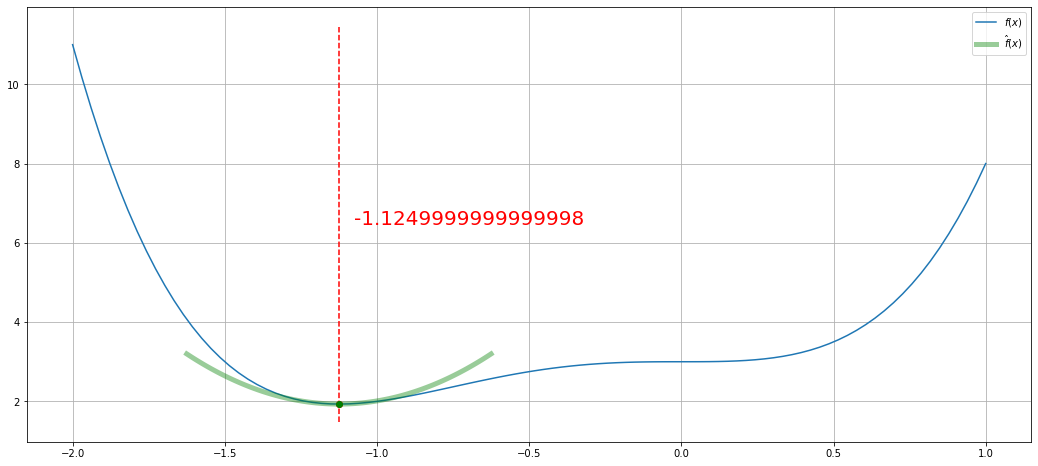

In [7]:
# Code credit: Professor Chuck Anderson CSU
import time
import IPython.display as ipd  # for display and clear_output
import random

def f(x):
    return 2 * x**4 + 3 * x**3 + 3

def df(x): 
    return 8 * x**3 + 9 * x**2

def ddf(x):
    return 24 * x**2 + 18*x

def taylorf(x,dx):
    return f(x) + df(x) * dx + 0.5 * ddf(x) * dx**2

xs = np.linspace(-2,1,num=100)

dxs = np.linspace(-0.5,0.5,num=100)

fig = plt.figure(figsize=(18, 8))

for rep in range(5):
    x = random.uniform(-2, 1)  # first guess at minimum
    for step in range(10):
        time.sleep(1) # sleep 2 seconds
        plt.clf()
        plt.plot(xs, f(xs))
        plt.grid('on')
        plt.plot(x+dxs, taylorf(x, dxs),'g-',linewidth=5, alpha=0.4)
        plt.plot(x, f(x), 'ro')         
        y0, y1 = plt.ylim()
        plt.plot([x, x], [y0, y1], 'r--')
        if step == 0:
            plt.text(x, 10, 'New first x', color='r', fontsize=40)
        plt.text(x + 0.05, (y0 + y1) * 0.5, str(x), color='r', fontsize=20)
     
        x = x - df(x) / float(ddf(x))
        plt.plot(x, f(x), 'go')
        plt.legend(('$f(x)$', '$\hat{f}(x)$'))
        
   
        ipd.clear_output(wait=True)
        ipd.display(fig)
    
ipd.clear_output(wait=True)

[Optimization Demos](https://www.deeplearning.ai/ai-notes/optimization/?utm_source=social&utm_medium=linkedin&utm_campaign=BlogAINotesOptimizationAugust272019)

<h1><center>Unknown Search Environments - Offline Search vs Online Search</center></h1>

- In unknown environments, where the agent does not know what states exist or what its actions do, the agent must use its actions as experiments in order to learn about the environment--- sometimes referred to as **exploration**.


- So far, we have concentrated on agents that use **offline search** algorithms. They compute a complete solution before taking their first action.


- In contrast, an **online search** agent interleaves computation and action: first it takes an action, then it observes the environment and computes the next action.

<h1><center>Online Search I</center></h1>


- Online search is a good idea in dynamic or semidynamic domains—domains where there is a penalty for sitting around and computing too long.


- Online search is also helpful in nondeterministic domains because it allows the agent to focus its computational efforts on the contingencies that actually arise rather than those that might happen but probably won’t.

<h1><center>Online Search II</center></h1>

- Online search is a necessary idea for unknown environments, where the agent does not know what states exist or what its actions do. In this state of ignorance, the agent faces an exploration problem and must use its actions as experiments in order to learn enough to make deliberation worthwhile.


- The canonical example of online search is a robot that is placed in a new building and must explore it to build a map that it can use for getting from A to B.


- Another example for online learning is Learning Real Time A* (LRTA*) where heuristics are updated in the realtime - as oppsed to A-star where heuristic for the search space is provided offline and is static.

<h1><center>Online Search III</center></h1>

- Two requirements for online search and learning: 
    - First, a formal and explicitly manipulable representation for general rules;

    - Second, algorithms that can construct suitable general rules from the specific observations made by the agent.


- To further imply this concept of online search, it's worth mentioning that in <b><font color="blue">Reinforcement Learning</font></b>, there are usually two phases: <b>Exploration</b> - in which the agent explores the environment - and <b>Exploitation</b> - where the agent exploits the knowledge about the environment gained through Exploration.